<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/Cardio_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# cardio_train.csv has 70000 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('cardio_train.csv', delimiter=';', nrows = nRowsRead)
df1.dataframeName = 'cardio_train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 13 columns


In [ ]:
df1.head(100)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,21076,1,158,53.0,110,70,1,1,0,0,1,0
96,131,19258,2,165,65.0,110,70,1,1,0,0,1,0
97,132,18410,1,165,99.0,150,110,1,1,0,0,0,1
98,133,21860,2,170,100.0,120,80,1,1,0,0,0,1


In [6]:
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,701.971000,19431.52100,1.359000,164.102000,74.734300,127.463000,92.655000,1.393000,1.241000,0.095000,0.04600,0.778000,0.507000
std,405.450658,2521.04067,0.479947,8.363704,15.259966,18.106918,102.072635,0.697881,0.589293,0.293362,0.20959,0.415799,0.500201
min,0.000000,14321.00000,1.000000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,343.750000,17509.50000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000
50%,717.000000,19666.00000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
75%,1049.250000,21367.25000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1387.000000,23661.00000,2.000000,188.000000,200.000000,200.000000,1100.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000


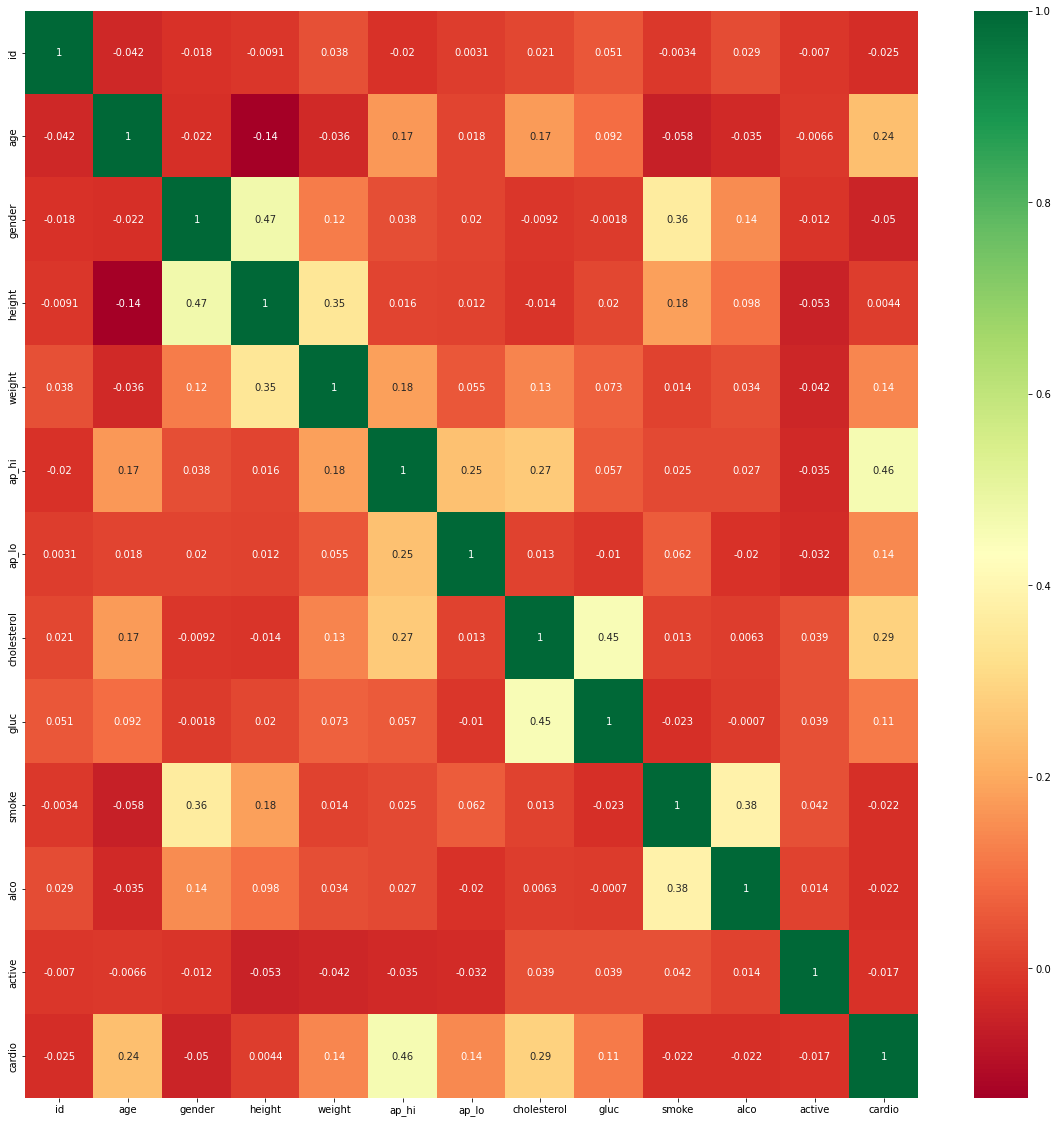

In [7]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aab02c990>,
      dtype=object)

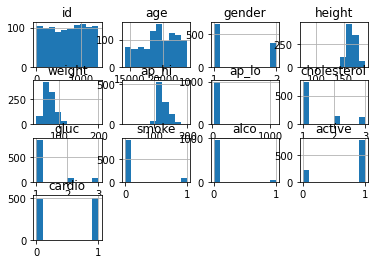

In [8]:
df1.hist()

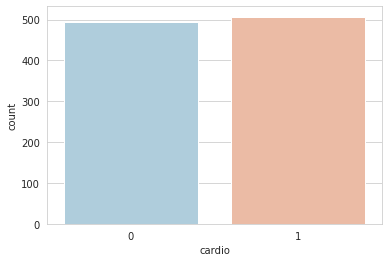

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='cardio',data = df1, palette='RdBu_r')

In [10]:
dataset = pd.get_dummies(df1, columns =['gender','cholesterol','gluc','smoke','alco','active'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [12]:
dataset.head()

,id,age,height,weight,ap_hi,ap_lo,cardio,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,0,-0.412148,0.466295,-0.834908,-0.964921,-0.124042,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,1,0.316091,-0.969194,0.673058,0.692734,-0.026024,1,1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,2,-0.228004,0.107422,-0.703781,0.140182,-0.222061,1,1,0,0,...,1,1,0,0,1,0,1,0,1,0
3,3,-0.717730,0.585919,0.476366,1.245285,0.071995,1,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4,4,-0.776862,-0.969194,-1.228291,-1.517472,-0.320079,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [13]:
y = dataset['cardio']
X = dataset.drop(['cardio'], axis = 1)

**KNN Classifier**

In [14]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

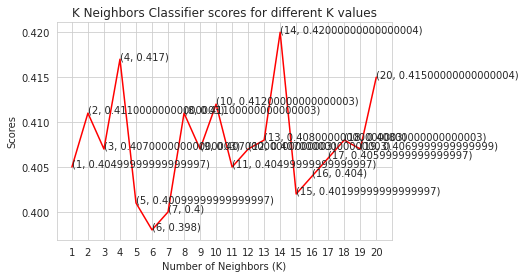

In [15]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [17]:
score.mean()

0.40700000000000003

**Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [20]:
score.mean()

0.708

In [21]:
x = df1[['gender','cholesterol','gluc','smoke','alco','active', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']].values
y = df1[['cardio']].values

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [27]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression ( C= 0.1, penalty= 'l1', solver= 'liblinear' )
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [37]:
model.score(x_train, y_train)

0.7314285714285714

Reporting Accuracy

In [38]:
print ('Training Accuracy: %.2f' % model.score(x_train,y_train))
print ('Test Accuracy: %.2f' % model.score(x_test,y_test))

Training Accuracy: 0.73
Test Accuracy: 0.73
